In [2]:
import numpy as np
import pandas as pd
from powersimdata import Grid
import matplotlib.pyplot as plt

In [3]:
from powersimdata.design.generation.cost_curves import get_supply_data

In [3]:
texas = Grid(["Texas"])

Reading bus.csv
Reading plant.csv
Reading gencost.csv
Reading branch.csv
Reading dcline.csv
Reading sub.csv
Reading bus2sub.csv
Reading zone.csv


In [4]:
# [warn | PowerModels]: angmin and angmax values are 0, widening these values on branch 1459 to +/- 60.0 deg.
texas.branch['angmin'] = -60
texas.branch['angmax'] = +60

# Set all base MVA to 100
texas.plant['mBase'] = 100

In [5]:
# Convert to Matpower format, and save to .m file
# https://matpower.org/docs/ref/matpower5.0/caseformat.html

Path_vineet = '/Users/vinee/ScenarioData/texas.m'
OUTPUT = Path_vineet
# OUTPUT = 'D:/papers/texas_test.m'

bus = 'mpc.bus = [\n' + \
      texas.bus.reset_index().iloc[:, :13].to_string(header=False, index=False).replace('\n',';\n') + \
      '\n];\n'

# Drop plant ID
gen = 'mpc.gen = [\n' + \
      texas.plant.iloc[:,:11].to_string(header=False, index=False).replace('\n',';\n') + \
      '\n];\n'

gencost = 'mpc.gencost = [\n' + \
          texas.gencost['after'].iloc[:,:-1].to_string(header=False, index=False).replace('\n',';\n') + \
          '\n];\n'

# Need to include angmin, angmax
branch = 'mpc.branch = [\n' + \
         texas.branch.iloc[:,:13].to_string(header=False, index=False).replace('\n',';\n') + \
         '\n];\n'

text_file = open(OUTPUT, "w")

n = text_file.write('function mpc = case3\n' + 'mpc.baseMVA = 100.0;\n' + "mpc.version = '2';\n" + bus + gen + gencost + branch)
text_file.close()

In [11]:
texas.plant[texas.plant['bus_id']==3003043]


,bus_id,Pg,Qg,Qmax,Qmin,Vg,mBase,status,Pmax,Pmin,...,type,interconnect,GenFuelCost,GenIOB,GenIOC,GenIOD,zone_id,zone_name,lat,lon
plant_id,,,,,,,,,,,,,,,,,,,,,
12955,3003043,0.0,0.0,0.66,-0.14,1.04,100,0,1.3,0.39,...,ng,Texas,5.728,4.5729,0.0004,0,303,West,32.05,-100.692


In [12]:
texas.branch.head()

,from_bus_id,to_bus_id,r,x,b,rateA,rateB,rateC,ratio,angle,...,branch_device_type,interconnect,from_zone_id,to_zone_id,from_zone_name,to_zone_name,from_lat,from_lon,to_lat,to_lon
branch_id,,,,,,,,,,,,,,,,,,,,,
100915,3001001,3001064,0.00524,0.03580,0.00609,221.0,0.0,0.0,0.0,0.0,...,Line,Texas,301,301,Far West,Far West,31.9067,-102.262,32.0011,-102.312
100916,3001001,3001064,0.00524,0.03580,0.00609,221.0,0.0,0.0,0.0,0.0,...,Line,Texas,301,301,Far West,Far West,31.9067,-102.262,32.0011,-102.312
100917,3001001,3001071,0.00435,0.02808,0.00536,221.0,0.0,0.0,0.0,0.0,...,Line,Texas,301,301,Far West,Far West,31.9067,-102.262,31.8403,-102.326
100918,3001001,3001071,0.00435,0.02808,0.00536,221.0,0.0,0.0,0.0,0.0,...,Line,Texas,301,301,Far West,Far West,31.9067,-102.262,31.8403,-102.326
100919,3001002,3001007,0.07776,0.46693,0.06336,98.0,0.0,0.0,0.0,0.0,...,Line,Texas,301,301,Far West,Far West,29.8880,-104.519,31.0935,-104.625


CONVERT ALL COORDINATES FROM LAT-LON TO UTM (2-D CARTESIAN PROJECTION)

100915 101015 101115 101215 101315 101415 101515 101615 101715 101815 101915 102015 102115 102215 102315 102415 102515 102615 102715 102815 102915 103015 103115 103215 103315 103415 103515 103615 103715 103815 103915 104015 104115 

Text(0.5, 1.0, 'Synthetic Grid Dataset: ERCOT')

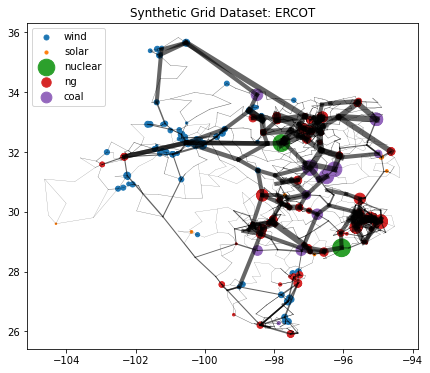

In [7]:
plt.figure(figsize=(7,6))
kinds = ['wind','solar','nuclear','ng','coal']
for k in kinds:
    sub = texas.plant[texas.plant.type==k]
    plt.scatter(sub.lon, sub.lat, s=sub.Pg/1300*300)
plt.legend(kinds)

count = 0
for b in texas.branch.index:
    if count%100==0: print(b, end=' ')
    count += 1
    branch = texas.branch.loc[b]
    plt.plot([branch.from_lon, branch.to_lon],
             [branch.from_lat, branch.to_lat], color='black', alpha=0.6, lw=branch.rateA/1000*2)
plt.title('Synthetic Grid Dataset: ERCOT')

In [8]:
# Read output file from Julia

In [9]:
Path_vineet = 
lmps = pd.read_csv('D:/Papers/lmps.csv')
gens = pd.read_csv('D:/Papers/gens.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Papers/lmps.csv'

In [ ]:
gens['x1'] -= 1 # Julia is 1-indexed -- make into 0 index for python
gens.set_index('x1').sort_index().round(2)

,x2
x1,
0.0,0.00
1.0,0.34
2.0,0.00
3.0,0.10
4.0,1.99
...,...
593.0,0.79
594.0,1.51
595.0,0.00


In [ ]:
gg = texas.plant[['Pmax']].reset_index(drop=True)
gg['Pg'] = gens.set_index('x1').sort_index().round(2).reindex(gg.index)*100

In [ ]:
(gg['Pg'] - gg['Pmax']).sort_values().dropna()

300   -652.00
231   -637.00
523   -562.90
421   -535.00
422   -535.00
        ...  
503      0.48
504      0.48
505      0.48
498      0.48
9        0.50
Length: 486, dtype: float64

In [ ]:
gg.loc[:10]

,Pmax,Pg
0,211.0,0.0
1,34.3,34.0
2,82.5,0.0
3,10.0,10.0
4,199.5,199.0
5,180.0,38.0
6,124.2,124.0
7,278.0,278.0
8,90.0,90.0
9,147.5,148.0


Text(0, 0.5, 'solved Pg (MW)')

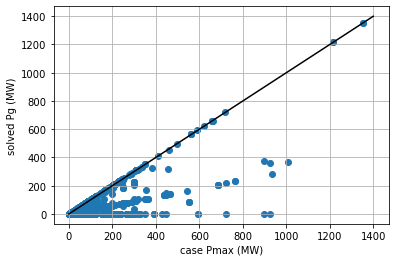

In [ ]:
plt.scatter(gg.fillna(0)['Pmax'], gg.fillna(0)['Pg'])
x = np.linspace(0, 1400); plt.plot(x, x, color='black'); plt.grid(True)
plt.xlabel('case Pmax (MW)')
plt.ylabel('solved Pg (MW)')

In [ ]:
lmps[['lat','lon']] = texas.bus.reindex(lmps['x1'].astype(int))[['lat','lon']].values

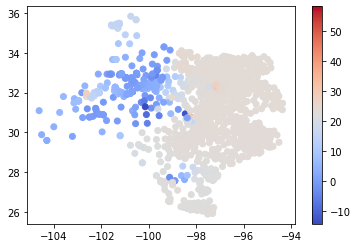

In [ ]:
#https://stackoverflow.com/questions/6063876/matplotlib-colorbar-for-scatter
#https://matplotlib.org/stable/tutorials/colors/colormaps.html
cm = plt.cm.get_cmap('coolwarm')
sc = plt.scatter(lmps['lon'], lmps['lat'], c=-lmps['x2']/100, cmap=cm)
plt.colorbar(sc)

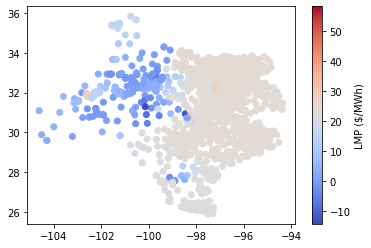

In [ ]:
#https://stackoverflow.com/questions/6063876/matplotlib-colorbar-for-scatter
#https://matplotlib.org/stable/tutorials/colors/colormaps.html
cm = plt.cm.get_cmap('coolwarm')
sc = plt.scatter(lmps['lon'], lmps['lat'], c=-lmps['x2']/100, cmap=cm)
cb = plt.colorbar(sc)
cb.set_label('LMP ($/MWh)')

In [ ]:
texas.plant

,bus_id,Pg,Qg,Qmax,Qmin,Vg,mBase,status,Pmax,Pmin,...,type,interconnect,GenFuelCost,GenIOB,GenIOC,GenIOD,zone_id,zone_name,lat,lon
plant_id,,,,,,,,,,,,,,,,,,,,,
12875,3001004,158.25,-30.38,44.94,-30.38,1.01,253.20,1,211.0,0.0,...,wind,Texas,0.0,0.0,0.0,0,301,Far West,32.9264,-101.648
12876,3001006,25.73,-4.94,7.31,-4.94,1.00,41.16,1,34.3,0.0,...,wind,Texas,0.0,0.0,0.0,0,301,Far West,32.2075,-101.388
12877,3001009,61.87,-11.88,17.57,-11.88,1.00,99.00,1,82.5,0.0,...,wind,Texas,0.0,0.0,0.0,0,301,Far West,30.9315,-102.201
12878,3001011,9.99,0.00,0.00,0.00,1.00,12.00,1,10.0,0.0,...,solar,Texas,0.0,0.0,0.0,0,301,Far West,29.6000,-104.300
12879,3001021,149.63,-28.73,42.49,-28.73,1.00,239.40,1,199.5,0.0,...,wind,Texas,0.0,0.0,0.0,0,301,Far West,31.9925,-101.117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14045,3001028,0.00,0.00,0.00,0.00,1.00,200.00,1,155.4,0.0,...,wind,Texas,0.0,0.0,0.0,0,301,Far West,32.8795,-101.247
14046,3002048,0.00,0.00,0.00,0.00,1.00,200.00,1,151.2,0.0,...,wind,Texas,0.0,0.0,0.0,0,302,North,33.7745,-100.990
14047,3003142,0.00,0.00,0.00,0.00,1.00,200.00,1,150.0,0.0,...,wind,Texas,0.0,0.0,0.0,0,303,West,31.2895,-100.153


In [ ]:
from powersimdata.design.generation.cost_curves import plot_capacity_vs_price
from powersimdata.design.generation.cost_curves import build_supply_curve



In [ ]:
texas.bus['Pd'].sum()

67109.21

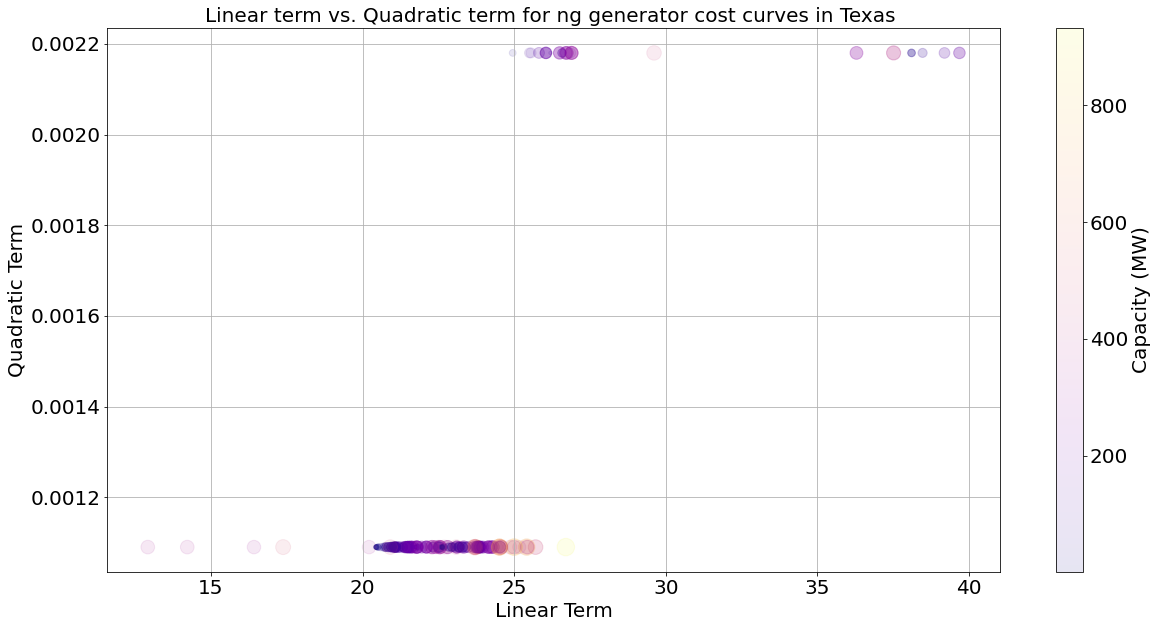

In [ ]:
from powersimdata.design.generation.cost_curves import plot_linear_vs_quadratic_terms

plot_linear_vs_quadratic_terms(texas, 'Texas', 'ng')

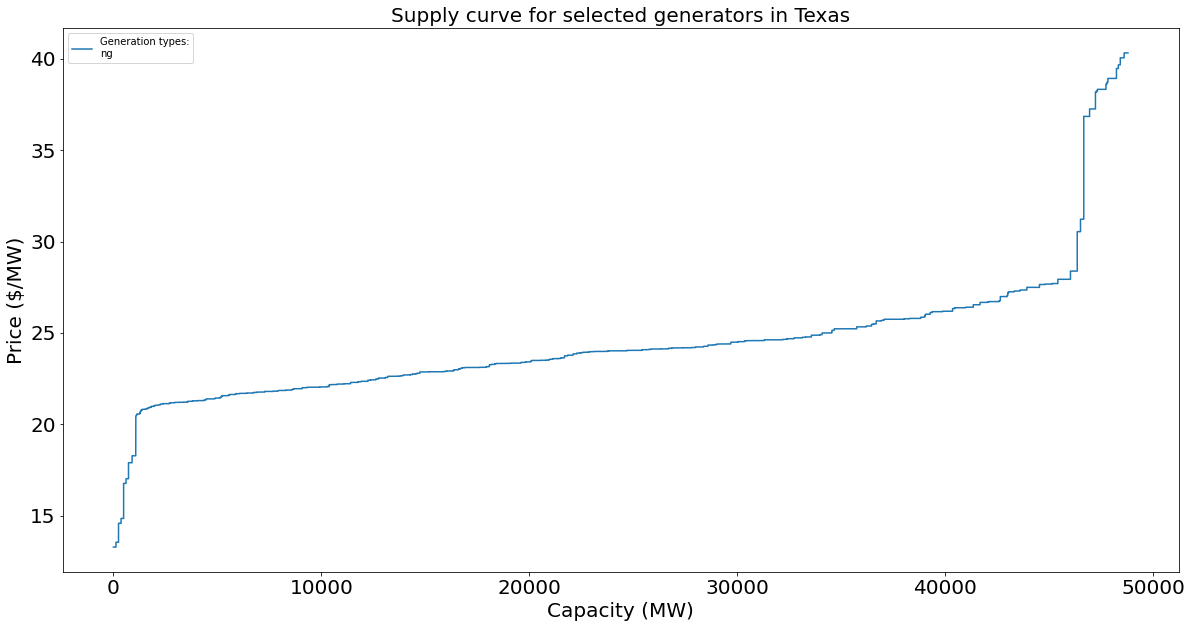

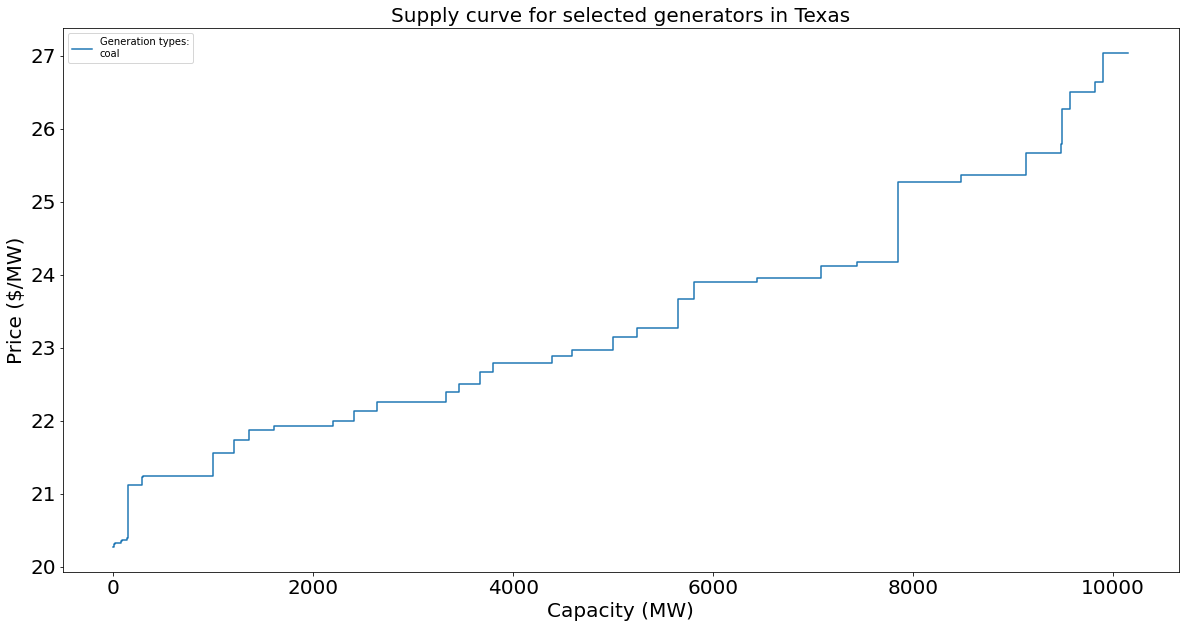

In [ ]:
P, F = build_supply_curve(texas, num_segments=2, area='Texas', gen_type='ng')
P, F = build_supply_curve(texas, num_segments=2, area='Texas', gen_type='coal')

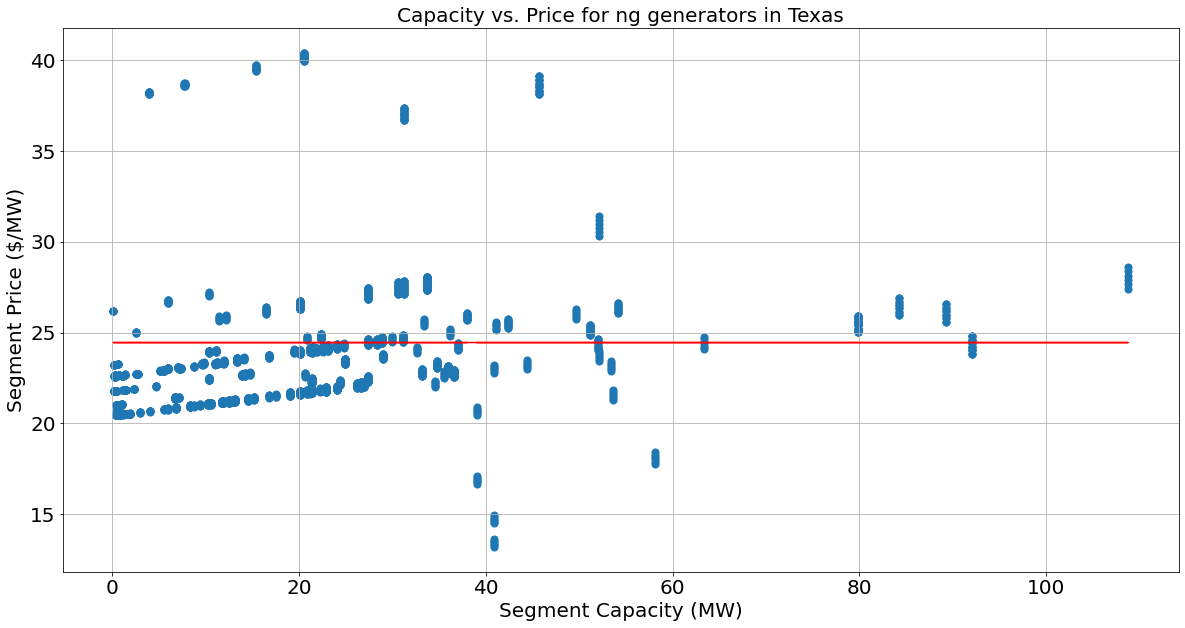

In [ ]:
plot_capacity_vs_price(texas, num_segments=6, area='Texas', gen_type='ng')